# __Data and Graph Analysis__

Different from original paper, in our reproduction attemp we will use data collected before the Brazilian presidential ellection in 2022.

The two terms used as search query to extract tweets were:

    1. #BolsonaroReeleito
    2. O LULA TÁ ELEITO
    
Both terms extracted in the same date, November 22nd, 2022.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
data_path = '../data/tweets/'

bols_df = pd.read_csv(data_path+'2022-11-22-#BolsonaroReeleito.csv')
lula_df = pd.read_csv(data_path+'2022-11-22-O LULA TÁ ELEITO.csv')

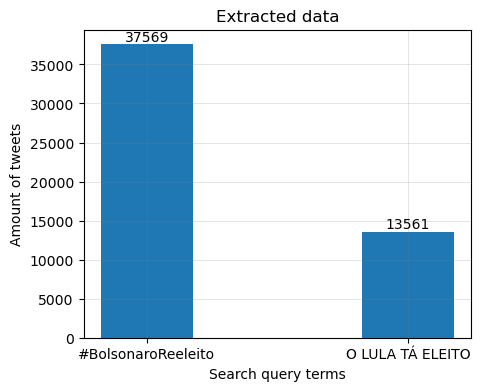

In [3]:
fig, ax = plt.subplots(figsize=(5,4))
ax.grid(True,
        color='grey',
        linestyle='-',
        linewidth=0.5,
        alpha=0.3,)
plt.bar(
    ['#BolsonaroReeleito', 'O LULA TÁ ELEITO'],
    [bols_df.shape[0], lula_df.shape[0]],
    width=0.35)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Search query terms')
plt.ylabel('Amount of tweets')
plt.title('Extracted data')
plt.show()

In [4]:
bols_df.drop('Unnamed: 0', axis=1, inplace=True)
lula_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
bols_df.sample(5)

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags
4497,2022-11-23 01:42:35,1595231304882200576,Será que ninguém vê oque o @ptbrasil está quer...,dalbo_michel,"{'id': 1495606704242892800, 'name': 'MICHEL Da...",True,"[{'id': '39522911', 'username': 'ptbrasil'}, {...",False,NaN,False,NaN,False,NaN,['#BolsonaroReeleito']
12919,2022-11-23 00:06:08,1595207030280802309,SOBRE O RELATÓRIO DO P.L.: VAMOS AGUARDAR A AN...,cynthia_paes2,"{'id': 1480083985921462273, 'name': 'Cynthia P...",False,NaN,False,NaN,False,NaN,True,"{'user': 'JoaquinTeixeira', 'user_id': 4641281...",['#BolsonaroReeleito']
28663,2022-11-22 22:06:34,1595176940977135617,"@UOL Brasil acima de tudo, Deus acima de todos...",Caue53090552,"{'id': 1052884119414337537, 'name': 'Caue Coel...",True,"[{'id': '70799317', 'username': 'UOL'}]",True,"{'user': 'UOL', 'user_id': 70799317, 'tweet_co...",False,NaN,False,NaN,['#BolsonaroReeleito']
19986,2022-11-22 23:04:24,1595191497976160258,A nossa bandeira jamais será vermelha\nA luta ...,NazareEderson,"{'id': 1540466601203474433, 'name': 'Éderson d...",False,NaN,False,NaN,False,NaN,True,"{'user': 'WillianWillCG', 'user_id': 154067971...",['#BolsonaroReeleito']
26019,2022-11-22 22:24:21,1595181418782629888,"É preciso esclarecer, o relatório do PL, basea...",luizaandreiaaa,"{'id': 731208718910664705, 'name': 'Andreia Lu...",False,NaN,False,NaN,False,NaN,True,"{'user': 'MauricioCostaRS', 'user_id': 3286919...",['#BolsonaroReeleito']


In [6]:
lula_df.sample(5)

,created_at,tweet_id,tweet_content,user,user_info,has_mention,mentions,is_reply,reply_to,is_quote,quoted_from,is_retweet,retweeted_from,hashtags
2048,2022-11-23 01:19:35,1595225515992006657,O LULA TÁ ELEITO\n\nImprensa estrangeira: Cand...,chelaferroni,"{'id': 1468933479152992265, 'name': 'chela', '...",False,NaN,False,NaN,False,NaN,True,"{'user': 'MarcelaSaraivas', 'user_id': 3075645...",NaN
12460,2022-11-22 21:32:01,1595168247674187776,"O LULA TÁ ELEITO, ele não https://t.co/17Db7FNnXY",simonystylinson,"{'id': 914280051297980416, 'name': '𝕄𝕠𝕟𝕪 𝕤𝕥𝕪𝕝𝕚...",False,NaN,False,NaN,False,NaN,True,"{'user': '_Janoninho', 'user_id': 156389790744...",NaN
6629,2022-11-22 23:25:57,1595196918996602880,O LULA TÁ ELEITO O LULA TÁ ELEITO,tudodiatodo,"{'id': 1093517282049953794, 'name': 'engenheir...",False,NaN,False,NaN,False,NaN,True,"{'user': 'tudodiatodo', 'user_id': 10935172820...",NaN
1769,2022-11-23 01:27:39,1595227546710335495,O LULA TÁ ELEITO! https://t.co/sHXCsF4dHA,Melissa_Funebre,"{'id': 736671305865564161, 'name': 'Eu retuito...",False,NaN,False,NaN,False,NaN,True,"{'user': 'lazarorosa25', 'user_id': 545643493,...",NaN
8616,2022-11-22 22:46:29,1595186988646285314,O LULA TÁ ELEITO! https://t.co/sHXCsF4dHA,MariliaRainhaa,"{'id': 1463673094711783425, 'name': 'Nordeste ...",False,NaN,False,NaN,False,NaN,True,"{'user': 'lazarorosa25', 'user_id': 545643493,...",NaN


### Data Filtering

In [20]:
bols_df['user'].value_counts()

Arnaldo96251489    249
Ohannaa98          230
DruzianMonica      212
clarahcantunes     180
CalM29541309       144
                  ... 
RodrigoOliari        1
EliasRayone          1
AfonsoSCampos        1
fllics_es            1
SuzzydeBrasilia      1
Name: user, Length: 15969, dtype: int64

### Merging Datasets

In [10]:
complete_df = pd.concat([bols_df, lula_df])
complete_df.shape

(51130, 14)

In [11]:
complete_df.drop_duplicates(inplace=True)
complete_df.shape

(50843, 14)